In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fe_partition_calc import fe_partition, monte_carlo_iter
sns.set_style("whitegrid")

df = pd.read_excel('Iron_speciation_calculator_input.xlsx')
df

,sample_index,temperature,pressure,log_fO2,SiO2,TiO2,Al2O3,FeO,MnO,MgO,...,Al2O3_std,FeO_std,MnO_std,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,NiO_std,Cr2O3_std
0,02As1,1593.15,100000,-7.09,46.66,2.43,10.16,13.06,0.19,13.15,...,0.10,0.22,0.34,0.10,0.26,0.20,0.04,0.04,NaN,0.04
1,01As1,1575.15,100000,-7.28,46.96,2.53,10.34,13.21,0.20,12.16,...,0.07,0.20,0.21,0.10,0.12,0.14,0.05,0.03,NaN,0.08
2,12As1,1593.15,100000,-5.09,46.36,2.40,10.07,12.34,0.20,13.87,...,0.07,0.22,0.35,0.09,0.26,0.21,0.06,0.04,NaN,0.04
3,07As1,1575.15,100000,-5.28,46.83,2.53,10.39,12.72,0.20,12.61,...,0.10,0.13,0.30,0.10,0.22,0.14,0.05,0.05,NaN,0.03


#### Generate monte carlo dataframe

In [2]:
#Change number to reflect how many new liquid compositions you wish to generate for that sample
mc_df = monte_carlo_iter(df, 3000)
mc_df.head()

,index,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,Cr2O3,sample_index,temperature,pressure,log_fO2
0,0.0,45.973549,2.496692,10.177874,12.873164,0.171772,13.082713,11.545580,2.457190,0.596483,0.190055,0.0,0.169776,02As1,1593.15,100000,-7.09
1,0.0,46.467057,2.260432,10.081756,12.957258,0.000000,13.159526,11.857991,1.919262,0.449910,0.183786,0.0,0.121229,02As1,1593.15,100000,-7.09
2,0.0,46.368018,2.514092,10.083672,13.360665,0.000000,13.086257,11.143800,2.125687,0.466874,0.178660,0.0,0.104560,02As1,1593.15,100000,-7.09
3,0.0,46.905343,2.246225,10.185606,13.365103,0.827690,13.113678,11.529701,1.965979,0.474585,0.164349,0.0,0.128133,02As1,1593.15,100000,-7.09
4,0.0,46.892460,2.467717,10.057820,13.131454,0.000000,13.238477,11.095273,2.125699,0.474183,0.154745,0.0,0.068995,02As1,1593.15,100000,-7.09


#### Input montecarlo dataframe into fe_partition function

##### Run single model

In [3]:
Putirka_2016 = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model='Putirka_2016')

##### Run all models

In [4]:
models = ["IrvineBarager_1971",
            "LeMaitre_1976",
            "Sack_1980",
            "Kress_1991",
            "Kress_1991_lowp",
            "Jayasuriya_2004",
            "Putirka_2016",
            "ONeill_2018",
            "Borisov_2018"]

df_all_models = pd.DataFrame()

for model in models:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_all_models = pd.concat([df_all_models, df_fe])

##### Run a chosen selection of models

In [5]:
models_selection = ["Sack_1980",
                    "Kress_1991",
                    "Kress_1991_lowp",
                    "Jayasuriya_2004",
                    "Putirka_2016",
                    "ONeill_2018",
                    "Borisov_2018"]

df_models_selection = pd.DataFrame()

for model in models_selection:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_models_selection = pd.concat([df_models_selection, df_fe])

df_models_selection.join(mc_df['temperature'])


,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,K2O,...,NiO,total,Fe3Fetot,XFe2O3_XFeO,sample_index,model,Fe2O3_FeO,Fe3_Fe2,XFeO15_XFeO,temperature
0,46.018875,2.499172,10.187832,11.388759,1.663815,0.171942,13.095676,11.557020,2.459623,0.597100,...,0.0,100.0,0.116181,0.065727,02As1,Sack_1980,NaN,NaN,NaN,1593.15
0,45.996620,2.497963,10.182905,10.948999,2.145624,0.171859,13.089343,11.551431,2.458434,0.596811,...,0.0,100.0,0.149897,0.088164,02As1,Kress_1991,NaN,NaN,NaN,1593.15
0,45.996959,2.497982,10.182980,10.955703,2.138279,0.171860,13.089440,11.551516,2.458452,0.596815,...,0.0,100.0,0.149383,0.087809,02As1,Kress_1991_lowp,NaN,NaN,NaN,1593.15
0,45.978871,2.496999,10.178976,10.598300,2.529856,0.171793,13.084293,11.546974,2.457485,0.596580,...,0.0,100.0,0.176809,0.107392,02As1,Jayasuriya_2004,NaN,NaN,NaN,1593.15
0,45.992578,2.497744,10.182010,10.869145,2.233113,0.171844,13.088193,11.550416,2.458218,0.596758,...,0.0,100.0,0.156023,0.092433,02As1,Putirka_2016,NaN,NaN,NaN,1593.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,46.833646,2.328401,10.287215,8.796967,4.163854,0.482840,12.450333,11.843835,2.055868,0.467571,...,0.0,100.0,0.298687,0.212949,07As1,Kress_1991_lowp,NaN,NaN,NaN,1575.15
11999,46.805297,2.326991,10.280988,8.248113,4.765393,0.482548,12.442797,11.836666,2.054623,0.467288,...,0.0,100.0,0.342045,0.259930,07As1,Jayasuriya_2004,NaN,NaN,NaN,1575.15
11999,46.834333,2.328435,10.287366,8.810270,4.149274,0.482847,12.450516,11.844009,2.055898,0.467578,...,0.0,100.0,0.297637,0.211883,07As1,Putirka_2016,NaN,NaN,NaN,1575.15
11999,46.798106,2.326616,10.279486,9.494787,3.532177,0.482472,12.440824,11.834788,2.054299,0.467194,...,0.0,100.0,0.250787,NaN,07As1,ONeill_2018,0.372012,0.334734,NaN,1575.15


### Plot output data

##### Single model

Text(0.5, 0.98, '02As1')

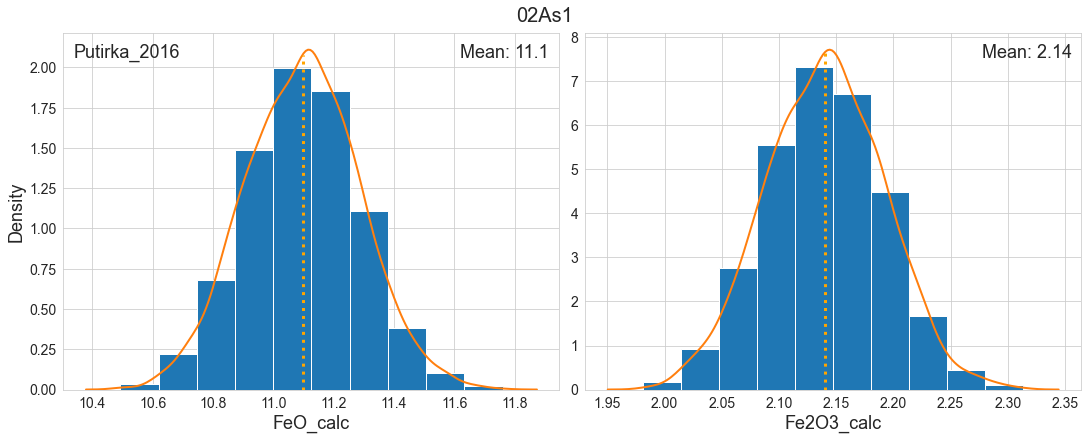

In [6]:
sample_feo = Putirka_2016[Putirka_2016['sample_index'] == '02As1']['FeO_calc']
sample_fe2o3 = Putirka_2016[Putirka_2016['sample_index'] == '02As1']['Fe2O3_calc']

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True, sharex='col')

#Plot histogram
ax[0].hist(sample_feo, density=True)
ax[1].hist(sample_fe2o3, density=True)

#Plot KDE
sns.kdeplot(sample_feo, linewidth=2, ax=ax[0])
sns.kdeplot(sample_fe2o3, linewidth=2, ax=ax[1])

#Calculate means and plot as line
sample_feo_mean = sample_feo.mean()
kdeline_feo = ax[0].lines[0]
xs = kdeline_feo.get_xdata()
ys = kdeline_feo.get_ydata()
height_feo = np.interp(sample_feo_mean, xs, ys)
ax[0].vlines(sample_feo_mean, 0, height_feo, 'orange', linewidth=3, ls=':')

sample_fe2o3_mean = sample_fe2o3.mean()
kdeline_fe2o3 = ax[1].lines[0]
xs = kdeline_fe2o3.get_xdata()
ys = kdeline_fe2o3.get_ydata()
height_feo = np.interp(sample_fe2o3_mean, xs, ys)
ax[1].vlines(sample_fe2o3_mean, 0, height_feo, 'orange', linewidth=3, ls=':')


ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

ax[0].annotate("Putirka_2016", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=18)
ax[0].annotate('Mean: {}'.format(round(sample_feo_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)
ax[1].annotate('Mean: {}'.format(round(sample_fe2o3_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

##### All models

Text(0.5, 0.98, '02As1')

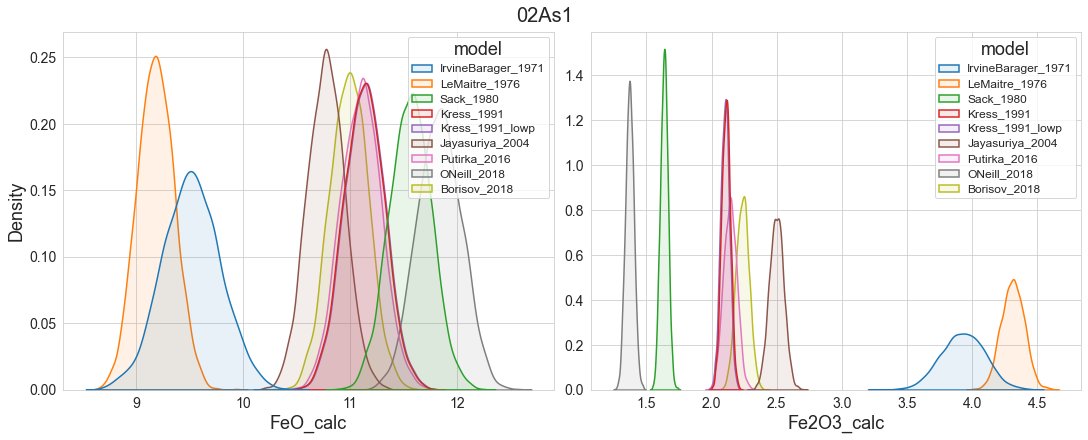

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == '02As1'].reset_index(), x="FeO_calc", hue="model",  linewidth=1.5, alpha=0.1, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == '02As1'].reset_index(), x="Fe2O3_calc", hue="model", linewidth=1.5, alpha=0.1, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

##### Subset of models

Text(0.5, 0.98, '02As1')

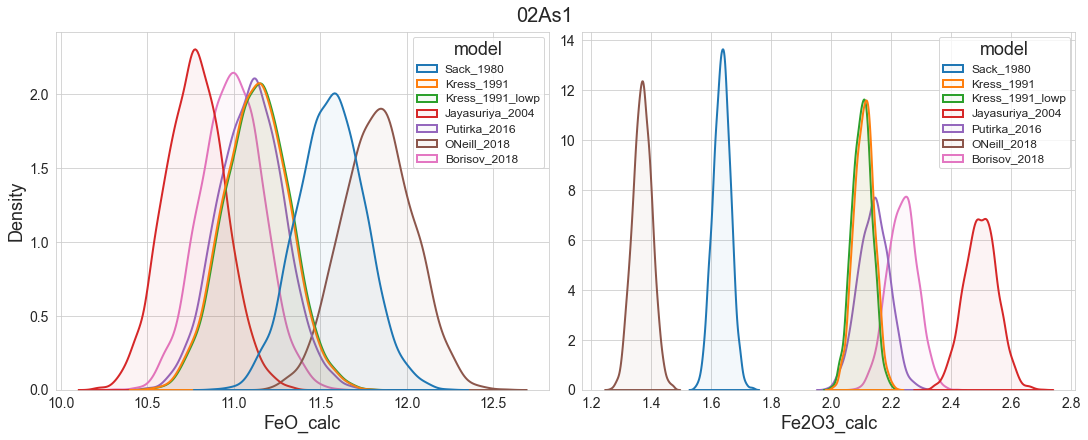

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == '02As1'].reset_index(), x="FeO_calc", common_norm=False, hue="model",  linewidth=2, alpha=0.05, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == '02As1'].reset_index(), x="Fe2O3_calc", common_norm=False, hue="model", linewidth=2, alpha=0.05, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

### Generate data tables

##### Single model

In [9]:
#One sample at a time
np.mean(Putirka_2016[Putirka_2016['sample_index'] == '02As1']['FeO_calc'])

11.097389464258784

In [10]:
#Table for all samples
#sort = False will preserve order of samples in input sheet, True will sort alphabetically
Putirka_2016.groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std']) 

Fe3Fetot                       FeO_calc                       \
                median      mean       std     median       mean       std   
sample_index                                                                 
02As1         0.147803  0.147879  0.003125  11.101652  11.097389  0.187843   
01As1         0.146215  0.146203  0.002171  11.267042  11.270639  0.168250   
12As1         0.292154  0.292183  0.005378   8.734885   8.739460  0.171588   
07As1         0.293915  0.293871  0.003821   8.956127   8.957400  0.114039   

             Fe2O3_calc                      
                 median      mean       std  
sample_index                                 
02As1          2.140856  2.140198  0.051424  
01As1          2.144649  2.144831  0.041149  
12As1          4.007668  4.009039  0.089826  
07As1          4.142281  4.142808  0.061552

##### All models

In [11]:
df_stats = pd.DataFrame()

for model in models:
    df_iter = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std'])
    df_iter['model'] = model
    df_stats = pd.concat([df_stats, df_iter])
    
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                median      mean       std    median      mean       std   
sample_index                                                               
02As1         0.270931  0.270926  0.012754  9.514258  9.515541  0.269512   
01As1         0.274443  0.274575  0.008693  9.589204  9.596625  0.220672   
12As1         0.283697  0.283942  0.008880  8.873345  8.876955  0.232516   
07As1         0.285065  0.284979  0.013952  9.110512  9.107710  0.229577   
02As1         0.296969  0.296951  0.004000  9.182001  9.183153  0.170670   

             Fe2O3_calc                                   model  
                 median      mean       std                      
sample_index                                                     
02As1          3.930226  3.928440  0.167220  IrvineBarager_1971  
01As1          4.038308  4.035968  0.109677  IrvineBarager_1971  
12As1          3.911171  3.910711  0.097838  IrvineBarager_1971  
07As1          4.035155  4.033623  0.186866  IrvineBarager_1971  
02As1          4.311592  4.310544  0.088414       LeMaitre_1976

In [13]:
#Sorts by df alphabetically sample name
df_stats.sort_index(level=0, ascending=True, inplace=True)
df_stats.head()

Fe3Fetot                       FeO_calc                       \
                median      mean       std     median       mean       std   
sample_index                                                                 
01As1         0.144083  0.144050  0.001190  11.297507  11.299456  0.168975   
01As1         0.274443  0.274575  0.008693   9.589204   9.596625  0.220672   
01As1         0.150230  0.150256  0.001655  11.194890  11.196846  0.158685   
01As1         0.093823  0.093821  0.001084  11.966886  11.968404  0.182638   
01As1         0.295201  0.295253  0.002990   9.308444   9.308021  0.150527   

             Fe2O3_calc                                   model  
                 median      mean       std                      
sample_index                                                     
01As1          2.112775  2.113270  0.028643     Kress_1991_lowp  
01As1          4.038308  4.035968  0.109677  IrvineBarager_1971  
01As1          2.199045  2.200483  0.045359        Borisov_2018  
01As1          1.376614  1.377124  0.025218         ONeill_2018  
01As1          4.333499  4.333762  0.074529       LeMaitre_1976

### Create output file for all oxides

##### Single model

In [14]:
Putirka_2016_means = Putirka_2016.groupby('sample_index', sort=False).mean()
Putirka_2016_std = Putirka_2016.groupby('sample_index', sort=False).std().add_suffix('_std')
Putirka_2016_size = Putirka_2016.groupby('sample_index', sort=False).size()

Putirka_2016_out = (pd.concat([Putirka_2016_means, Putirka_2016_std], axis=1))
Putirka_2016_out.insert(0, 'mc', Putirka_2016_size)
Putirka_2016_out.head()

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std
sample_index,,,,,,,,,,,,,,,,,,,,,
02As1,3000,46.517055,2.423249,10.129011,11.097389,2.140198,0.249022,13.109852,11.600419,1.945866,...,0.118667,0.234501,0.196629,0.040471,0.040065,0.039256,0.0,1.683932e-14,0.003125,0.002152
01As1,3000,46.939239,2.530535,10.335078,11.270639,2.144831,0.217529,12.157717,11.800731,1.833794,...,0.115527,0.127571,0.139506,0.049739,0.029803,0.075056,0.0,1.753284e-14,0.002171,0.001489
12As1,3000,46.394619,2.401043,10.075660,8.739460,4.009039,0.266972,13.874684,11.490869,1.946696,...,0.117957,0.239239,0.206926,0.060243,0.040480,0.039695,0.0,1.718762e-14,0.005378,0.005368
07As1,3000,46.710060,2.523123,10.362921,8.957400,4.142808,0.251885,12.576000,11.686774,1.984397,...,0.108358,0.200584,0.134463,0.049432,0.049613,0.030181,0.0,1.729697e-14,0.003821,0.003833


##### All models + create output excel file

In [15]:
stats_dict = {}

with pd.ExcelWriter("Iron_speciation_calculator_output.xlsx") as writer:
    for model in models:
        df_iter_means = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).mean(numeric_only=True)                      #If you have an older version of pandas, you may need to delete "numeric_only=True"
        df_iter_std = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).std(numeric_only=True).add_suffix('_std')
        df_iter_size = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).size()

        df_iter_concat = pd.concat([df_iter_means, df_iter_std], axis=1)
        df_iter_concat.insert(0, 'mc', df_iter_size)
        df_iter_concat['model'] = model
        stats_dict[model] = df_iter_concat
        df_iter_concat.to_excel(writer, sheet_name=model) 

##### Select model of interest from dictionary

In [16]:
stats_dict['Kress_1991']

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std,Fe2O3_FeO_std,Fe3_Fe2_std,XFeO15_XFeO_std,model
sample_index,,,,,,,,,,,,,,,,,,,,,
02As1,3000,46.518539,2.423326,10.129334,11.126415,2.108403,0.249030,13.110270,11.600790,1.945932,...,0.040066,0.039257,0.0,2.255384e-14,0.001776,0.001217,NaN,NaN,NaN,Kress_1991
01As1,3000,46.940199,2.530587,10.335289,11.289244,2.124455,0.217534,12.157965,11.800972,1.833834,...,0.029804,0.075057,0.0,2.223056e-14,0.001195,0.000817,NaN,NaN,NaN,Kress_1991
12As1,3000,46.391412,2.400877,10.074963,8.676856,4.077668,0.266953,13.873724,11.490075,1.946569,...,0.040477,0.039692,0.0,2.245210e-14,0.003091,0.003129,NaN,NaN,NaN,Kress_1991
07As1,3000,46.707717,2.522996,10.362401,8.911932,4.192633,0.251871,12.575369,11.686188,1.984300,...,0.049610,0.030180,0.0,2.220783e-14,0.002282,0.002312,NaN,NaN,NaN,Kress_1991
